<a href="https://colab.research.google.com/github/ram30098singh/DEVP-1/blob/main/Overfitting%20in%20DecisionTreeRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Overfitting in DecisionTreeRegressor**
```
With the following parameters:

1.   max_leaf_nodes
2.   max_depth
3.   min_samples_split
4.   max_features


```



In [1]:
# 1.0 Data Loading Code Runs At This Point
import pandas as pd

# 1.0.1
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,accuracy_score

# 1.0.2
from pathlib import Path

In [2]:
# 1.0.3 Get data from gdrive:

from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
# 1.1 Path to data folder:

pathToFolder = "/gdrive/MyDrive/bdda1/bdda1/mobile_price"

In [4]:
path = Path(pathToFolder) / "train.csv"

In [5]:
# 1.2 Display from a cell outputs of multiple commands:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [6]:
# 1.3 Load data:

X = pd.read_csv(path)

In [7]:
# 1.3.1 About data:

X.shape
X.head()

(2000, 21)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
# 1.3.2 Data types:
X.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [9]:
# 1.2 How many unique values each column has:

for i in X.columns:
  print(i, X[i].nunique())


battery_power 1094
blue 2
clock_speed 26
dual_sim 2
fc 20
four_g 2
int_memory 63
m_dep 10
mobile_wt 121
n_cores 8
pc 21
px_height 1137
px_width 1109
ram 1562
sc_h 15
sc_w 19
talk_time 19
three_g 2
touch_screen 2
wifi 2
price_range 4


In [10]:

# 1.5 Filter rows with missing values
X.isnull().sum().sum()


0

In [11]:

# 2.0 Choose target and features
y = X.ram
X.pop('ram')

0       2549
1       2631
2       2603
3       2769
4       1411
        ... 
1995     668
1996    2032
1997    3057
1998     869
1999    3919
Name: ram, Length: 2000, dtype: int64

In [12]:


# 2.1 Split data into training and validation data, for both features and target:

train_X, val_X, train_y, val_y = train_test_split(X,y,random_state=0)


In [13]:
# 3.0 A function to model and also to calculate MAE
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
  # 3.1 Instantiate Decision tree regressor
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)   #continuous values of ram hence dtreeregresor

    # 3.2 Train model
    model.fit(train_X, train_y)
    # 3.3 Make predictions
    preds_val = model.predict(val_X)
    # 3.4 Get error
    mae = mean_absolute_error(val_y, preds_val)
    # 3.5 Return error
    return(mae)


In [14]:

# 3.1 Compare MAE with differing values of max_leaf_nodes:
#  Get

for max_leaf_nodes in [5, 50, 500, 1000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print(f"Max leaf nodes: {max_leaf_nodes} \t\t Mean Absolute Error: {my_mae}")

Max leaf nodes: 5 		 Mean Absolute Error: 328.0137400362019
Max leaf nodes: 50 		 Mean Absolute Error: 292.86164271266836
Max leaf nodes: 500 		 Mean Absolute Error: 341.3223753093312
Max leaf nodes: 1000 		 Mean Absolute Error: 345.8306666666666


Text(0.5, 1.0, 'Max Leaf Nodes vs. Mean Absolute Error')

Text(0.5, 0, 'Max Leaf Nodes')

Text(0, 0.5, 'Mean Absolute Error')

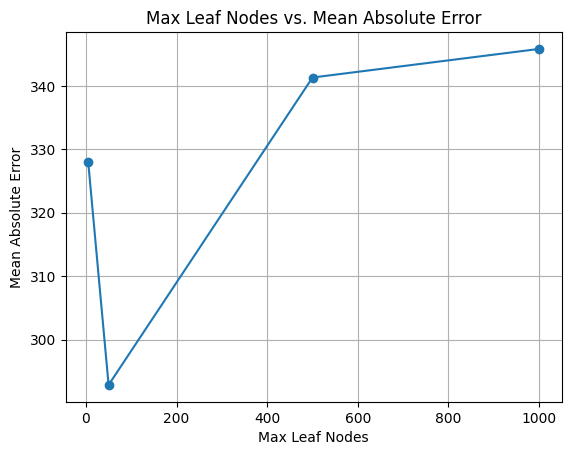

In [15]:
import matplotlib.pyplot as plt

max_leaf_nodes = [5, 50, 500, 1000]
mae_values = []

for max_leaf_node in max_leaf_nodes:
    my_mae = get_mae(max_leaf_node, train_X, val_X, train_y, val_y)
    mae_values.append(my_mae)

# Plotting the results
plt.plot(max_leaf_nodes, mae_values, marker='o')
plt.title('Max Leaf Nodes vs. Mean Absolute Error')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Mean Absolute Error')
plt.grid(True)
plt.show()


In [16]:

# 3.2 Compare MAE with differing values of max_depth:
#  Get

for max_depth in [2, 10, 15, 20]:
    my_mae = get_mae(max_depth, train_X, val_X, train_y, val_y)
    print(f"Max depth: {max_depth} \t\t Mean Absolute Error: {my_mae}")

Max depth: 2 		 Mean Absolute Error: 525.8716507708398
Max depth: 10 		 Mean Absolute Error: 287.809148968663
Max depth: 15 		 Mean Absolute Error: 281.4569676301756
Max depth: 20 		 Mean Absolute Error: 281.23574053182455


Text(0.5, 1.0, 'Max Depth vs. Mean Absolute Error')

Text(0.5, 0, 'Max Depth')

Text(0, 0.5, 'Mean Absolute Error')

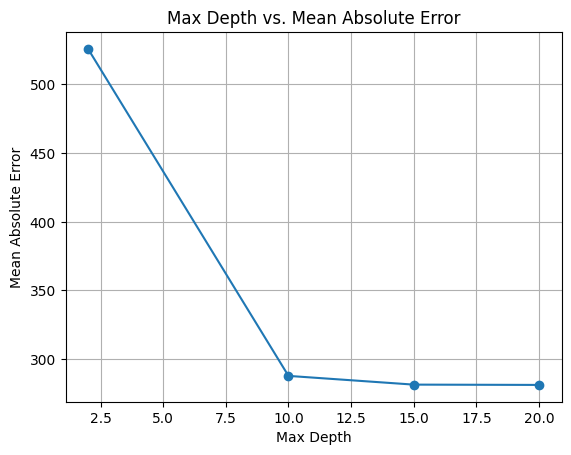

In [17]:
max_depths = [2, 10, 15, 20]
mae_values = []

for max_depth in max_depths:
    my_mae = get_mae(max_depth, train_X, val_X, train_y, val_y)
    mae_values.append(my_mae)

# Plotting the results
plt.plot(max_depths, mae_values, marker='o')
plt.title('Max Depth vs. Mean Absolute Error')
plt.xlabel('Max Depth')
plt.ylabel('Mean Absolute Error')
plt.grid(True)
plt.show()


In [18]:
# 3.3 Compare MAE with differing values of min_samples_split:
#  Get

for min_samples_split in [2, 5, 8, 10]:
    my_mae = get_mae(min_samples_split, train_X, val_X, train_y, val_y)
    print(f"Min sample split: {min_samples_split} \t\t Mean Absolute Error: {my_mae}")

Min sample split: 2 		 Mean Absolute Error: 525.8716507708398
Min sample split: 5 		 Mean Absolute Error: 328.0137400362019
Min sample split: 8 		 Mean Absolute Error: 299.70917453372454
Min sample split: 10 		 Mean Absolute Error: 287.809148968663


Text(0.5, 1.0, 'Min Sample Split vs. Mean Absolute Error')

Text(0.5, 0, 'Min Sample Split')

Text(0, 0.5, 'Mean Absolute Error')

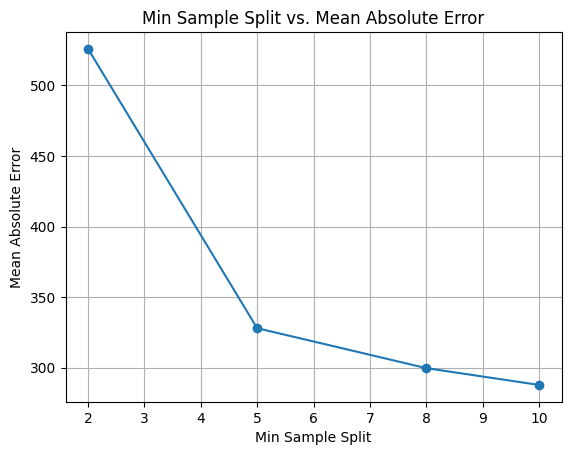

In [19]:
min_samples_splits = [2, 5, 8, 10]
mae_values = []

for min_samples_split in min_samples_splits:
    my_mae = get_mae(min_samples_split, train_X, val_X, train_y, val_y)
    mae_values.append(my_mae)

# Plotting the results
plt.plot(min_samples_splits, mae_values, marker='o')
plt.title('Min Sample Split vs. Mean Absolute Error')
plt.xlabel('Min Sample Split')
plt.ylabel('Mean Absolute Error')
plt.grid(True)
plt.show()


In [20]:
# 3.4 Compare MAE with differing values of max_features:
#  Get

for max_features in [4, 10, 18, 20]:
    my_mae = get_mae(max_features, train_X, val_X, train_y, val_y)
    print(f"Max features: {max_features} \t\t Mean Absolute Error: {my_mae}")

Max features: 4 		 Mean Absolute Error: 336.1565142510854
Max features: 10 		 Mean Absolute Error: 287.809148968663
Max features: 18 		 Mean Absolute Error: 282.9902057533382
Max features: 20 		 Mean Absolute Error: 281.23574053182455


Text(0.5, 1.0, 'Max Features vs. Mean Absolute Error')

Text(0.5, 0, 'Max Features')

Text(0, 0.5, 'Mean Absolute Error')

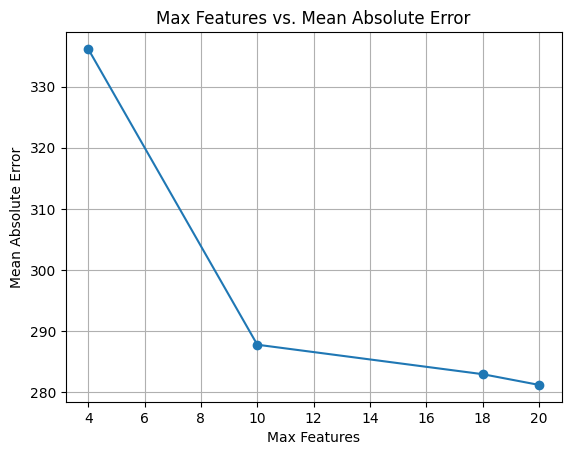

In [21]:
max_features = [4, 10, 18, 20]
mae_values = []

for feature in max_features:
    my_mae = get_mae(feature, train_X, val_X, train_y, val_y)
    mae_values.append(my_mae)

# Plotting the results
plt.plot(max_features, mae_values, marker='o')
plt.title('Max Features vs. Mean Absolute Error')
plt.xlabel('Max Features')
plt.ylabel('Mean Absolute Error')
plt.grid(True)
plt.show()
